In [409]:
import numpy as np
import matplotlib.pyplot as plt
import qutip as qtp

In [151]:
#Create the Jaynes-Cumming Hamiltonian in 10 Dimensional Space
photons = 10
g = 15.0 #Choose specifically 

# Define the Dispersive Hamiltonian 
GHz = 10**9
MHz = 10**6
us = 10**-6
wr =  10.7594 * GHz * 2 * np.pi
wa = 4.833 * GHz * 2 * np.pi #Get from the Paper f_01) same as the atom transition frequency 
disp_shift = - 1.3 * MHz * 2*np.pi # Paper has a negative value and I made my hamiltonian's sign match theirs   
hbar = 1


## Cavity Bloch Equations

$\frac{d\langle a \rangle}{dt} = -i\Delta_{cm}\langle a \rangle - i \Chi\langle a\sigma_z\rangle - iK\langle a^\dag a\rangle\langle a\rangle - iK\langle a\rangle - i\epsilon_m(t)-\frac{\kappa}{2}\langle a \rangle$

$\frac{d\langle\sigma_z\rangle}{dt} = -\gamma_1 (1+\langle\sigma_z\rangle)$

$\frac{d\langle a\sigma_z\rangle}{dt} = -i\Delta_{cm}\langle a\sigma_z\rangle -i\Chi\langle a\rangle - iK\langle a^\dag a\rangle\langle a\sigma_z\rangle - iK\langle a\sigma_z\rangle - i\epsilon_m (t)\langle \sigma_z\rangle - \frac{\kappa}{2}\langle a\sigma_z\rangle -\gamma_1\langle a\rangle - \gamma_1\langle a\sigma_z\rangle$

$\frac{d\langle a^\dag a\rangle}{dt} = -2\epsilon_m Im\langle a\rangle - \kappa\langle a^\dag a\rangle$

Where K is the Kerr Term

In [629]:
from scipy.integrate import solve_ivp
chi = - 1.3 * MHz * 2*np.pi
ws = 4.833 * GHz * 2 * np.pi 
wm = (10.7594 * GHz) * 2 * np.pi

Kerr = -14*10**3 * 2 * np.pi  # 14 KHz in frequency (14 *2pi in radians)
#Kerr = 0


#delta_as = wa-ws
delta_rm = wr-wm

kappa = 1.1 * MHz * 2*np.pi 
omega = 0
print(1/kappa)

gamma_1 = 1/(50*us)
gamma_phi= ((60*us)**(-1) - (2*50*us)**(-1))
print(gamma_phi)

P_1photon = (chi)**2 + (kappa/2)**2
#P_1photon = (2*np.pi*1.595 * MHz)**2
P_norm = 3.6

ampl = np.sqrt(P_norm*P_1photon)

width = 2*us

meas_time = np.array([width+0.04*us])
print(np.sqrt(P_1photon)/(2*np.pi*MHz))
step = 101
#times = np.concatenate((np.linspace(0, width, step), meas_time, np.linspace((width+2*0.04*us), 2*width, step)), axis=0) 
times = np.linspace(0, 4*us, step, endpoint=True)

def Square(t, v, amp, width): 

    a = v[0]
    z = v[1]
    az = v[2]
    ad_a = v[3]


    diff_a = -1j * delta_rm * a - 1j * chi * az - 1j * ((t<=width)*amp) - kappa/2 * a - 1j*( Kerr * ad_a*a+ 0.5* Kerr * a) #The factor of 2 on the Kerr term is gone
    diff_z = - gamma_1*(1+z)
    diff_az = - 1j * delta_rm * az - 1j * chi * a - 1j * ((t<=width)*amp) * z - gamma_1 * a - (gamma_1 + kappa/2)*az - 1j * (Kerr *ad_a*az + 0.5* Kerr * az)
    diff_ad_a = -2*((t<=width)*amp)*a.imag - kappa*ad_a

    return [diff_a, diff_z, diff_az, diff_ad_a]
res1 = solve_ivp(Square, (0, 4*us), t_eval = times, y0 = [complex(0), complex(1), complex(0), complex(0)], args=(ampl,width), method = 'DOP853')

1.4468631190172305e-07
6666.666666666668
1.4115594213493106


2.04e-06


C:\Users\schsd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


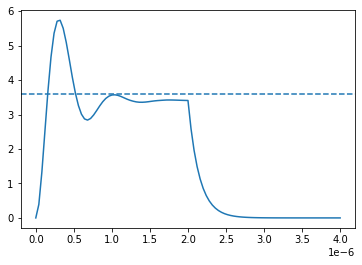

In [630]:
photon_num = res1.y[3]
halfway = int(step/2) + 1
print(times[halfway])
times = res1.t

plt.plot(times, photon_num)
plt.axhline(P_norm, ls = '--')
#plt.plot(times, res1.y[1])

# Figure 2 Plots

## Figure 2b Cavity Decay after the Square Pulse 

In [631]:
## Look at the Cavity Decay with a Normalized Power of 2 
decay_pow = 2 
decay_amp = np.sqrt(decay_pow*P_1photon)
sqr_width = 2*us
step = 101

times = np.linspace(0, 2*sqr_width, step)

tolerance = sqr_width/((step-1) * sqr_width)

start_decay, = np.where(np.isclose(times, sqr_width, rtol=tolerance))


gnd_decay = solve_ivp(Square, (0, 2*width), t_eval = times, y0 = [complex(0), complex(-1), complex(0), complex(0)], args=(decay_amp, sqr_width), method = 'DOP853')
exc_decay = solve_ivp(Square, (0, 2*width), t_eval = times, y0 = [complex(0), complex(1), complex(0), complex(0)], args=(decay_amp, sqr_width), method = 'DOP853')

C:\Users\schsd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\schsd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


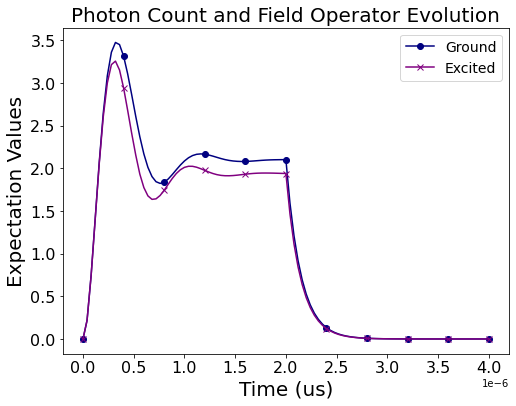

In [635]:
gnd_photons = gnd_decay.y[3]
exc_photons = exc_decay.y[3]

square_pulse = (times <= sqr_width)

fig, ax1 = plt.subplots()
fig.set_size_inches([8,6])

ax1.plot(times,gnd_photons, label=r'Ground', color='navy', marker='o', markevery = 10)
ax1.plot(times, exc_photons, label = r'Excited', color='purple', marker='x', markevery =10)
ax1.legend(loc='upper right', fontsize = 14)
ax1.tick_params(axis='both', which='major', labelsize=16)
ax1.tick_params(axis='both', which='minor', labelsize=16)
ax1.set_xlabel('Time (us)', fontsize = 20)
ax1.set_ylabel('Expectation Values', fontsize =20)
ax1.set_title('Photon Count and Field Operator Evolution', fontsize =20)

#left, bottom, width, height = [0.6, 0.6, 0.2, 0.2]
#ax2 = fig.add_axes([left, bottom, width, height])
#ax2.plot(times,square_pulse, color = 'black')
#ax2.set_xticks((np.linspace(0, 2*us, 5)))
#ax2.set_yticks([-1.0, 0, 1.0])
#ax2.axhline(1.0, ls='--', color='grey')
#ax2.axhline(0, ls='--', color='grey')
#ax2.axhline(-1.0, ls='--',color='grey')
##ax2.set_xlim([0, 2*us])
#ax2.set_ylim([-1.1, 1.1])
#ax2.set_xlabel('times (us)')
#ax2.set_ylabel('Amplitude')
#ax2.set_title('Square  Pulse')


fig.savefig('Square_Pulse.png')

plt.show()

1.447071691523539e-07
1.443418185283857e-07


C:\Users\schsd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\schsd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


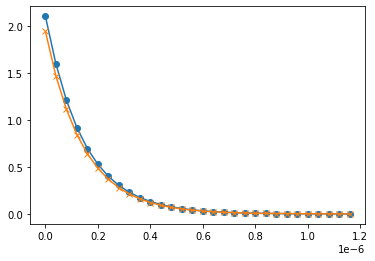

In [404]:
from scipy.optimize import curve_fit
gnd_photon_decay= gnd_decay.y[3][start_decay[0]:80]
exc_photon_decay = exc_decay.y[3][start_decay[0]:80]
decay_times = times[start_decay[0]:80] - times[start_decay[0]]
def exp_decay(x, a, b):
    return a*np.exp(-x/b)

gnd_para, _ = curve_fit(exp_decay, decay_times, gnd_photon_decay, p0=[2, 0.15*us])
exc_para, _ = curve_fit(exp_decay, decay_times, exc_photon_decay, p0=[2, 0.15*us])

gnd_fit = exp_decay(decay_times, *gnd_para)
exc_fit = exp_decay(decay_times, *exc_para)


plt.plot(decay_times, gnd_photon_decay, marker='o')
plt.plot(decay_times, exc_photon_decay, marker='x')
#plt.plot(decay_times, y_fit)

Tcav_gnd = gnd_para[1]
Tcav_exc = exc_para[1]

print(Tcav_gnd)
print(Tcav_exc)

### Figure 2B Graphing

C:\Users\schsd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\schsd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


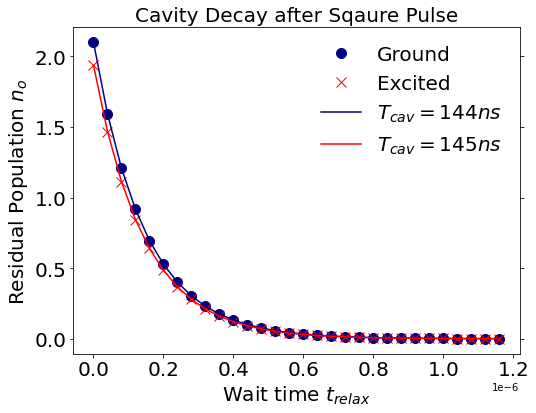

In [65]:
plt.figure(figsize=(8, 6))

plt.plot(decay_times, gnd_photon_decay, marker='o', label='Ground', color='navy', markersize=10, ls='')
plt.plot(decay_times, exc_photon_decay, marker='x', label='Excited', color ='red',markersize = 10, ls='')
plt.plot(decay_times, gnd_fit, color = 'navy', label=r'$T_{cav} =  144ns$')
plt.plot(decay_times, exc_fit, color = 'red', label=r'$T_{cav} = 145ns$')
plt.tick_params(right = True, direction='out')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel(r'Wait time $t_{relax}$', fontsize = 20)
plt.ylabel(r'Residual Population $n_o$', fontsize = 20)
plt.title(r'Cavity Decay after Sqaure Pulse', fontsize = 20)
plt.legend(prop={'size': 20}, frameon = False)

### Plot 2c

[3.6]
[2.97027118+0.j]


C:\Users\schsd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\schsd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


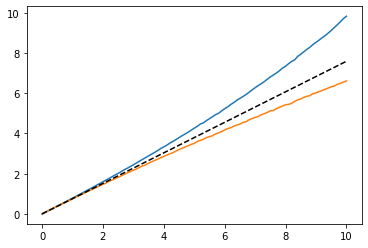

In [405]:
powers = np.linspace(0, 10, 101)
gnd_pow_photon = np.array([])
exc_pow_photon = np.array([])
for pow in powers:
    amp = np.sqrt(pow*P_1photon)
    gnd = solve_ivp(Square, (0, width+0.04*us), y0 = [complex(0), complex(-1), complex(0), complex(0)], args=(amp,width), method = 'DOP853')
    exc = solve_ivp(Square, (0, width+0.04*us), y0 = [complex(0), complex(1), complex(0), complex(0)], args=(amp,width), method = 'DOP853')
    gnd_photons = gnd.y[3]
    exc_photons = exc.y[3]
    gnd_pow_photon = np.append(gnd_pow_photon, gnd_photons[-1])
    exc_pow_photon = np.append(exc_pow_photon, exc_photons[-1])
linear_cav = np.exp(-kappa*0.04*us) * powers

plt.plot(powers, gnd_pow_photon)
plt.plot(powers, exc_pow_photon)
plt.plot(powers, linear_cav, ls = '--', color ='black')

target_power, = np.where(np.isclose(powers, 3.6))  
print(powers[target_power]) 
print(gnd_pow_photon[target_power])
    

C:\Users\schsd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\schsd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


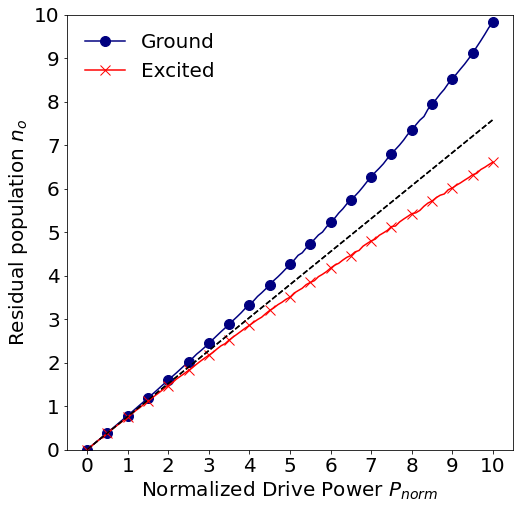

In [301]:
linear_cav = np.exp(-kappa*0.04*us) * powers
plt.figure(figsize=(8,8))

plt.plot(powers, linear_cav, color='black', ls='--') 
plt.plot(powers, gnd_pow_photon, color = 'navy', marker ='o', markersize = 10, markevery=5, label='Ground')
plt.plot(powers, exc_pow_photon, color = 'red', marker ='x', markersize=10, markevery=5, label='Excited')
plt.xticks(np.linspace(0, 10, 11), fontsize=20)
plt.yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],fontsize=20)
plt.ylim(0, 10)
plt.xlabel(r'Normalized Drive Power $P_{norm}$', fontsize = 20)
plt.ylabel(r'Residual population $n_o$', fontsize=20)
plt.legend(prop = {'size' : 20}, frameon = False)

plt.plot(powers, linear_cav, ls = '--', color ='black')

## Plot Figure 3A With a Parametric Curve

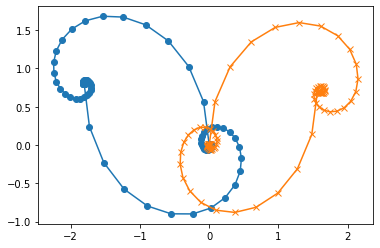

In [302]:
power_norm = 3.6
amp = np.sqrt(power_norm*P_1photon)
width = 2*us
times = np.linspace(0, 150*0.024*us, 100)
gnd = solve_ivp(Square, (0, 150*0.024*us), t_eval= times, y0 = [complex(0), complex(-1), complex(0), complex(0)], args=(amp, width), method = 'DOP853')
exc = solve_ivp(Square, (0, 150*0.024*us), t_eval=times, y0 = [complex(0), complex(1), complex(0), complex(0)], args=(amp, width), method = 'DOP853')

gnd_a_dag = np.conjugate(gnd.y[0])
exc_a_dag = np.conjugate(exc.y[0])

gnd_real_exp = np.real(gnd_a_dag)
gnd_img_exp = np.imag(gnd_a_dag)
exc_real_exp = np.real(exc_a_dag)
exc_img_exp = np.imag(exc_a_dag)

 #The negative sign on the imaginary part demonstrates that the I and Q components that were measured in the experiement were or a dag
plt.plot(gnd_real_exp, gnd_img_exp, marker='o')
plt.plot(exc_real_exp, exc_img_exp, marker='x')

### Graphing for Figure 3A 

Text(0.5, 1.0, '$P_{norm} = 3.6$ Square Pulse')

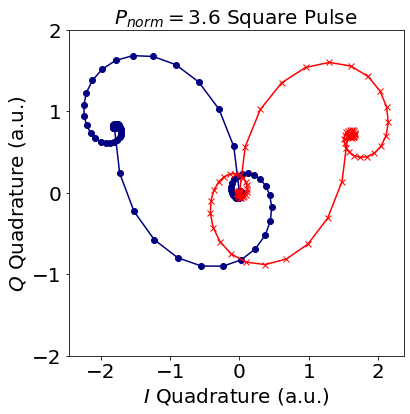

In [6]:
plt.figure(figsize = (6, 6))

plt.plot(gnd_real_exp, gnd_img_exp, marker='o', color = 'navy')
plt.plot(exc_real_exp, exc_img_exp, marker='x', color = 'red')
plt.xlabel(r'$I$ Quadrature (a.u.)', fontsize = 20)
plt.ylabel(r'$Q$ Quadrature (a.u.)', fontsize = 20)
plt.xticks(np.linspace(-2, 2, 5),fontsize=20)
plt.yticks(np.linspace(-2, 2, 5),fontsize=20)
plt.title(r'$P_{norm} = 3.6$ Square Pulse', fontsize = 20)

### Define a New Simulation with the Clear Pulse instead of the Standard Measurement Pulse

In [406]:
def CLEAR(t, v, ringup1, ringup2, amp_steady, ringdown1, ringdown2, upkick_width, downkick_width, steady_width): 

    a = v[0]
    z = v[1]
    az = v[2]
    ad_a = v[3]

    t1 = upkick_width
    t2 = 2*upkick_width
    t3 = t2+steady_width
    t4 = t3+downkick_width
    t5 = t4+downkick_width


    clear_pulse = (t <= t1) * ringup1 + ((t>t1) & (t<=t2)) * ringup2 + ((t>t2) & (t<= t3)) * amp_steady + ((t>t3) & (t<=t4)) * ringdown1 + ((t>t4) & (t<=t5))*ringdown2

    diff_a = - 1j * chi * az - 1j * (clear_pulse) - kappa/2 * a - 1j*(Kerr * ad_a*a  + 0.5 * Kerr * a)
    diff_z = - gamma_1*(1+z)
    diff_az = - 1j * chi * a - 1j * (clear_pulse) * z - gamma_1 * a - (gamma_1 + kappa/2)*az - 1j * (Kerr *ad_a*az  + 0.5 * Kerr * az)
    diff_ad_a = -2*(clear_pulse)*np.imag(a) - kappa*ad_a

    return [diff_a, diff_z, diff_az, diff_ad_a]

In [490]:
pulse_P = 10
amp_steady = np.sqrt(P_1photon * pulse_P)

#ringup_amp = np.sqrt(P_1photon*(pulse_P + 0.1*pulse_P))
#ringup_amp2 = np.sqrt(P_1photon *(pulse_P - 0.5*pulse_P))
#ringdown_amp1 = -np.sqrt(P_1photon * 0.075* pulse_P)
#ringdown_amp2 = np.sqrt(P_1photon * 0.4*pulse_P)

ringup_amp = 1.05*np.sqrt(P_1photon*pulse_P)
ringup_amp2 = 0.7*np.sqrt(P_1photon *pulse_P)
ringdown_amp1 = 0* np.sqrt(P_1photon* pulse_P)
ringdown_amp2 = 0.275*np.sqrt(P_1photon *pulse_P)

test_kick_width = 0.1*us #150ns 
upkick_width = 0.15*us
downkick_width = 0.145*us
kick_width = 0.15*us
steady_width = 1.5*us
steps = 200

para = (ringup_amp, ringup_amp2, amp_steady, ringdown_amp1, ringdown_amp2, upkick_width, downkick_width, steady_width)

times = np.linspace(0, steady_width*3, steps)

gnd_Clear = solve_ivp(CLEAR, (0, steady_width*4), t_eval= times, y0 = [complex(0), complex(-1), complex(0), complex(0)], args=para, method = 'DOP853')
exc_Clear= solve_ivp(CLEAR, (0, steady_width*4), t_eval= times, y0 = [complex(0), complex(1), complex(0), complex(0)], args=para, method = 'DOP853')
exc_Square = solve_ivp(Square, (0, steady_width*4), t_eval= times, y0 = [complex(0), complex(1), complex(0), complex(0)], args=(amp_steady, steady_width + 2 * upkick_width), method = 'DOP853')



C:\Users\schsd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\schsd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


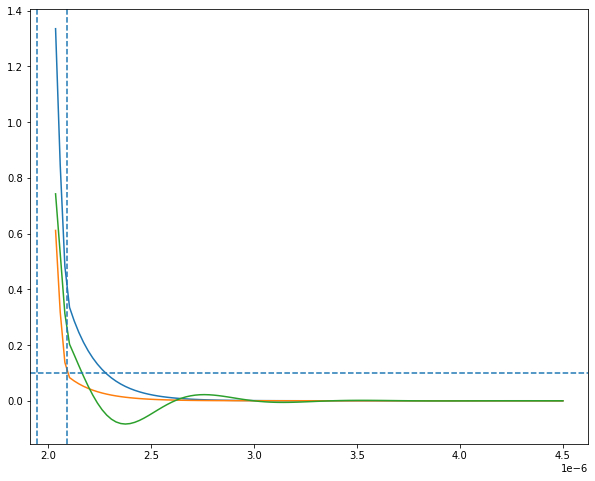

In [491]:
t=times

t10 = kick_width
t20 = 2*kick_width
t30 = t20+steady_width
t40 = t30+kick_width
t50 = t40+kick_width

t1 = upkick_width
t2 = 2*upkick_width
t3 = t2+steady_width
t4 = t3+downkick_width
t5 = t4+downkick_width

clear_pulse = (t <= t1) * ringup_amp + ((t>t1) & (t<=t2)) * ringup_amp2 + ((t>t2) & (t<= t3)) * amp_steady + ((t>t3) & (t<=t4)) * ringdown_amp1 + ((t>t4) & (t<=t5))*ringdown_amp2
square_pulse = (t<=steady_width) * amp_steady*1e-7


clear_pulse = clear_pulse*1e-7
photons_Clear_gnd = gnd_Clear.y[3]
photons_Clear_exc= exc_Clear.y[3]

plt.figure(figsize=(10,8))

plt.plot(times[90:], photons_Clear_gnd[90:])
plt.plot(times[90:], photons_Clear_exc[90:])
plt.plot(times[90:], np.imag(exc_Clear.y[0])[90:])
#plt.plot(times, exc_Square.y[3] )
#plt.plot(times, np.imag(np.conj(exc_Clear.y[0])))
#plt.plot(times, clear_pulse)
#plt.plot(times, np.imag(gnd_Clear.y[0]))
#plt.plot(times, np.conj(gnd_Clear.y[0]))
#plt.plot(times, square_pulse)
#plt.axvline(t1, linestyle= '--')
#plt.axvline(t2, ls= '--')
#plt.axvline(t3, ls='--')
plt.axvline(t4, ls = '--')
plt.axvline(t5, ls = '--')
#plt.axvline(t50, ls= '--')
plt.axhline(0.1, ls = '--')

#print(photons_Clear_gnd[600:700])

In [17]:
tolerance = steady_width/((steps-1)*t5)

relax, = np.where(np.isclose(times, t5, rtol=tolerance, atol=1e-10))
meas1 = relax[0]



## Figure 3C

In [494]:
us = 1e-6
upkick_width = 0.145* us #150ns 
downkick_width = 0.145* us
steady_width = 2.3* us
steps = 100

t1 = upkick_width
t2 = 2*upkick_width
t3 = t2+steady_width
t4 = t3+ downkick_width
t5 = t4+ downkick_width

powers = np.linspace(0, 10, 101)
gnd_res_photon = np.array([])
exc_res_photon = np.array([])

gnd_res_photon_sqr = np.array([])
exc_res_photon_sqr = np.array([])

for pow in powers:
    pulse_P = pow
    amp_steady = np.sqrt(P_1photon * pulse_P)

    #ringup_amp = np.sqrt(P_1photon*(pulse_P + 0.1*pulse_P))
    #ringup_amp2 = np.sqrt(P_1photon *(pulse_P - 0.5*pulse_P))
    #ringdown_amp1 = -np.sqrt(P_1photon * 0.015 * pulse_P)
    #ringdown_amp2 = np.sqrt(P_1photon * 0.3* pulse_P)

    ringup_amp = 1.05*np.sqrt(P_1photon*pulse_P)
    ringup_amp2 = 0.7*np.sqrt(P_1photon *pulse_P)
    ringdown_amp1 = -0.* np.sqrt(P_1photon* pulse_P)
    ringdown_amp2 = 0.275*np.sqrt(P_1photon *pulse_P)

    para = (ringup_amp, ringup_amp2, amp_steady, ringdown_amp1, ringdown_amp2, upkick_width, downkick_width, steady_width)
    sqr_para = (amp_steady, steady_width+2*upkick_width)

    gnd_Clear = solve_ivp(CLEAR, (0, t5), y0 = [complex(0), complex(-1), complex(0), complex(0)], args=para, method = 'DOP853')
    exc_Clear = solve_ivp(CLEAR, (0, t5), y0 = [complex(0), complex(1), complex(0), complex(0)], args=para, method = 'DOP853')

    gnd_Square = solve_ivp(Square, (0, t5), y0 = [complex(0), complex(-1), complex(0), complex(0)], args=sqr_para, method = 'DOP853')
    exc_Square = solve_ivp(Square, (0, t5), y0 = [complex(0), complex(1), complex(0), complex(0)], args=sqr_para, method = 'DOP853')

    gnd_photons = gnd_Clear.y[3]
    exc_photons = exc_Clear.y[3]
    gnd_res_photon = np.append(gnd_res_photon, gnd_photons[-1])
    exc_res_photon = np.append(exc_res_photon, exc_photons[-1])

    gnd_photons_sqr = gnd_Square.y[3]
    exc_photons_sqr = exc_Square.y[3]
    gnd_res_photon_sqr = np.append(gnd_res_photon_sqr, gnd_photons_sqr[-1])
    exc_res_photon_sqr = np.append(exc_res_photon_sqr, exc_photons_sqr[-1])

glitch_gnd = np.where(gnd_res_photon>2.0)
glitch_exc = np.where(exc_res_photon>2.0)

glitch_gnd_sqr = np.where(gnd_res_photon_sqr>4.0)
glitch_exc_sqr = np.where(exc_res_photon_sqr>4.0)

gnd_res_photon = np.delete(gnd_res_photon, glitch_gnd)
exc_res_photon = np.delete(exc_res_photon, glitch_exc)
powers_gnd = np.delete(powers, glitch_gnd)
powers_exc = np.delete(powers, glitch_exc)

gnd_res_photon_sqr = np.delete(gnd_res_photon_sqr, glitch_gnd_sqr)
exc_res_photon_sqr = np.delete(exc_res_photon_sqr, glitch_exc_sqr)
powers_gnd_sqr= np.delete(powers, glitch_gnd_sqr)
powers_exc_sqr = np.delete(powers, glitch_exc_sqr)

    

### Graphing for Figure 3C

C:\Users\schsd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\schsd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\schsd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\schsd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-pa

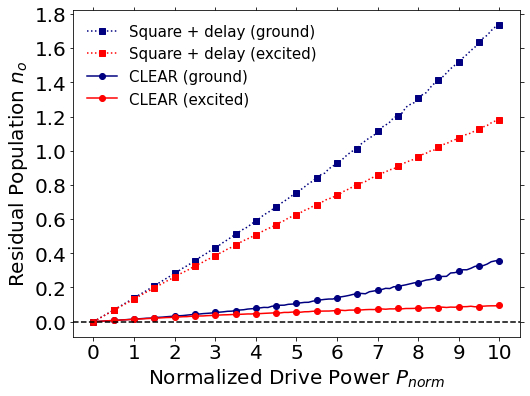

In [497]:
plt.figure(figsize =(8,6))


plt.plot(powers_gnd_sqr, gnd_res_photon_sqr, marker='s', markevery = 5, ls=':', color ='navy', label = 'Square + delay (ground)')
plt.plot(powers_exc_sqr, exc_res_photon_sqr, marker='s', markevery = 5, ls = ':', color ='red', label = 'Square + delay (excited)')
plt.plot(powers_gnd, gnd_res_photon, marker='o', markevery = 5, ls='-', color ='navy', label = 'CLEAR (ground)')
plt.plot(powers_exc, exc_res_photon, marker='o', markevery = 5, ls='-', color ='red', label = 'CLEAR (excited)')


plt.xlabel(r'Normalized Drive Power $P_{norm}$', fontsize = 20)
plt.ylabel(r'Residual Population $n_o$', fontsize = 20)
plt.axhline(0.0, ls = '--', color = 'black')
plt.yticks(np.linspace(0, 1.8, 10), fontsize=20)
plt.xticks(np.linspace(0, 10, 11), fontsize=20)
plt.tick_params(direction = 'out', bottom = True, top = True, left = True, right = True)
plt.legend(prop={'size':15}, frameon = False)
plt.show()

## Figure 3b

C:\Users\schsd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


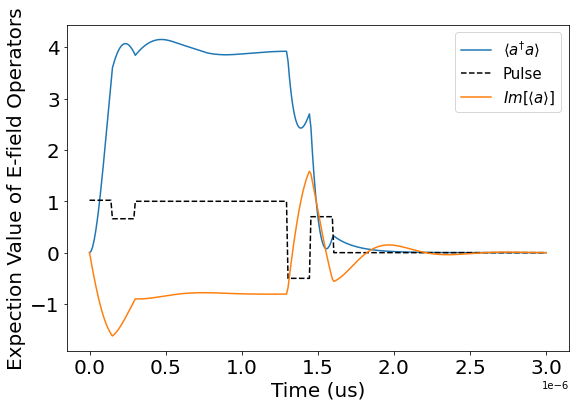

In [582]:
upkick_width = 0.15*us #150ns 
downkick_width = 0.15*us
steady_width = 1*us
steps = 100

t1 = upkick_width
t2 = 2*upkick_width
t3 = t2+steady_width
t4 = t3+downkick_width
t5 = t4+downkick_width

pulse_P = 3.6
amp_steady = np.sqrt(P_1photon * pulse_P)

#ringup_amp = np.sqrt(P_1photon*(pulse_P + 0.16*pulse_P))
#ringup_amp2 = np.sqrt(P_1photon *(pulse_P - 0.65*pulse_P))
#ringup_amp = np.sqrt(P_1photon*(pulse_P + 0.22*pulse_P))
#ringup_amp2 = np.sqrt(P_1photon *(pulse_P - 0.65*pulse_P))
#ringdown_amp1 = -np.sqrt(P_1photon *0.2* pulse_P)
#ringdown_amp2 = np.sqrt(P_1photon * 0.5* pulse_P)
ringup_amp = 1.02*np.sqrt(P_1photon*pulse_P)#1.02 1.3
ringup_amp2 = 0.66*np.sqrt(P_1photon*pulse_P)#0.66 0.5
ringdown_amp1 = - 0.5*np.sqrt(P_1photon*pulse_P) #0.05 0.8
ringdown_amp2 = 0.7*np.sqrt(P_1photon*pulse_P) #0.35 0.8

para = (ringup_amp, ringup_amp2, amp_steady, ringdown_amp1, ringdown_amp2, upkick_width, downkick_width, steady_width)
times = np.linspace(0, 300*0.01*us, 300)
clear_pulse = (times <= t1) * ringup_amp + ((times>t1) & (times<=t2)) * ringup_amp2 + ((times>t2) & (times<= t3)) * amp_steady + ((times>t3) & (times<=t4)) * ringdown_amp1 + ((times>t4) & (times<=t5))*ringdown_amp2
clear_pulse = clear_pulse/np.sqrt(P_1photon*P_norm)


gnd_Clear = solve_ivp(CLEAR, (0, 300*0.01*us), t_eval= times, y0 = [complex(0), complex(-1), complex(0), complex(0)], args=para, method = 'DOP853')
exc_Clear= solve_ivp(CLEAR, (0, 300*0.01*us), t_eval= times, y0 = [complex(0), complex(1), complex(0), complex(0)], args=para, method = 'DOP853')


photons_Clear_gnd = gnd_Clear.y[3]
photons_Clear_exc= exc_Clear.y[3]

gnd_a_dag = np.conjugate(gnd_Clear.y[0])
exc_a_dag = np.conjugate(exc_Clear.y[0])

gnd_real_exp = np.real(gnd_a_dag)
gnd_img_exp = np.imag(gnd_a_dag)
exc_real_exp = np.real(exc_a_dag)
exc_img_exp = np.imag(exc_a_dag)

plt.figure(figsize=(9,6))
plt.plot(times, photons_Clear_gnd, label=r'$\langle a^\dag a \rangle$', )
plt.plot(times, clear_pulse, color='black', ls='--', label='Pulse')
#plt.plot(times[:100], photons_Clear_exc[:100])
#plt.plot(times[:100], exc_real_exp[:100])
#plt.plot(times[:100], exc_img_exp[:100])
plt.plot(times, np.imag(gnd_Clear.y[0]), label=r'$Im[\langle a \rangle]$')
#plt.plot(times, gnd_img_exp, label=r'$\langle a^\dag \rangle$')

#plt.axvline(t1, ls= '--', color ='red')
#plt.axvline(t2, ls= '--', color = 'red')
#plt.axvline(t3, ls='--', color = 'navy')
#plt.axvline(t4, ls='--', color='navy')
#plt.axvline(t5, ls='--', color='navy')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Time (us)', fontsize=20)
plt.ylabel('Expection Value of E-field Operators', fontsize=20)
plt.legend(prop={'size':15}, fontsize = 20)

 #The negative sign on the imaginary part demonstrates that the I and Q components that were measured in the experiement were or a dag
#plt.plot(gnd_real_exp, gnd_img_exp, marker='o')
#plt.plot(exc_real_exp, exc_img_exp, marker='x')

C:\Users\schsd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


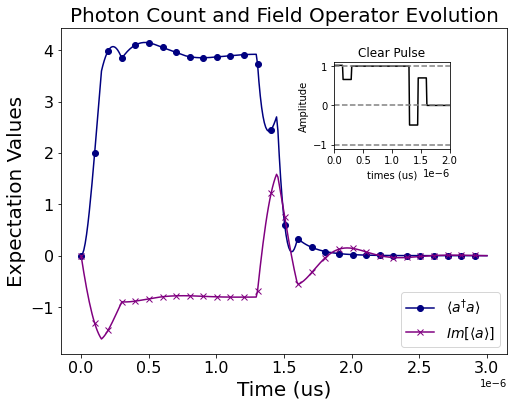

In [625]:
fig, ax1 = plt.subplots()
fig.set_size_inches([8,6])

ax1.plot(times,photons_Clear_gnd, label=r'$\langle a^\dag a\rangle$', color='navy', marker='o', markevery = 10)
ax1.plot(times, np.imag(gnd_Clear.y[0]), label = r'$Im[\langle a\rangle]$', color='purple', marker='x', markevery =10)
ax1.legend(loc='lower right', fontsize = 14)
ax1.tick_params(axis='both', which='major', labelsize=16)
ax1.tick_params(axis='both', which='minor', labelsize=16)
ax1.set_xlabel('Time (us)', fontsize = 20)
ax1.set_ylabel('Expectation Values', fontsize =20)
ax1.set_title('Photon Count and Field Operator Evolution', fontsize =20)

left, bottom, width, height = [0.6, 0.6, 0.2, 0.2]
ax2 = fig.add_axes([left, bottom, width, height])
ax2.plot(times,clear_pulse, color = 'black')
ax2.set_xticks((np.linspace(0, 2*us, 5)))
ax2.set_yticks([-1.0, 0, 1.0])
ax2.axhline(1.0, ls='--', color='grey')
ax2.axhline(0, ls='--', color='grey')
ax2.axhline(-1.0, ls='--',color='grey')
ax2.set_xlim([0, 2*us])
ax2.set_ylim([-1.1, 1.1])
ax2.set_xlabel('times (us)')
ax2.set_ylabel('Amplitude')
ax2.set_title('Clear Pulse')


fig.savefig('Clear_Pulse_Motivation.png')

plt.show()

### Graphing for Figure 3c

([<matplotlib.axis.YTick at 0x1de1b4da580>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

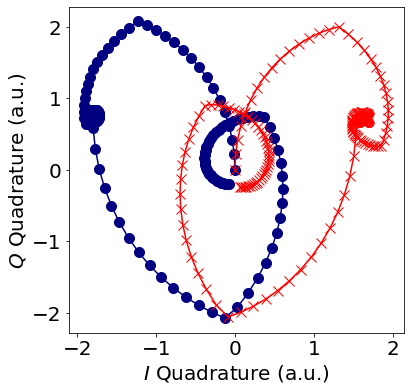

In [567]:
plt.figure(figsize = (6, 6))

plt.plot(gnd_real_exp, gnd_img_exp, marker='o', color = 'navy', markersize=10)
plt.plot(exc_real_exp, exc_img_exp, marker='x', color = 'red', markersize =10)
plt.xlabel(r'$I$ Quadrature (a.u.)', fontsize = 20)
plt.ylabel(r'$Q$ Quadrature (a.u.)', fontsize = 20)
plt.xticks(np.linspace(-2, 2, 5),fontsize=20)
plt.yticks(np.linspace(-2, 2, 5),fontsize=20)
#plt.title(r'$P_{norm} = 3.6$, $t_{kick} = 150ns$', fontsize = 20)


In [624]:
print(gamma_phi)

6666.666666666668
